### Repaso: Regresión Lineal + Feature Engineering

Situación: Eres analista en una empresa de energía. Tienes datos de temperatura exterior (°C) y consumo de energía (kWh). Sabes que la relación no es lineal.

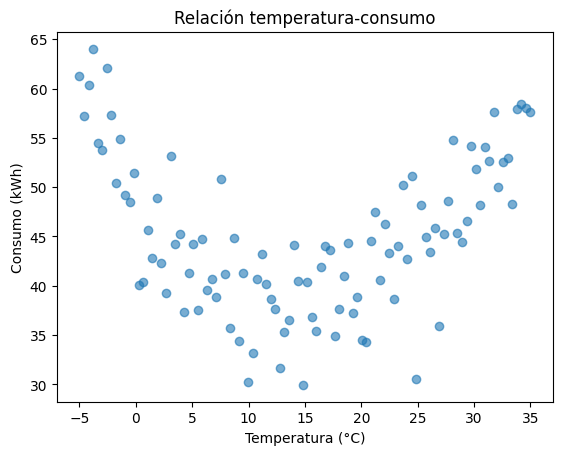

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
np.random.seed(42)
temperatura = np.linspace(-5, 35, 100)
consumo = 0.05 * temperatura ** 2 - 1.5 * temperatura + 50 + np.random.normal(0, 5, 100)

# Visualizar
plt.scatter(temperatura, consumo, alpha = 0.6)
plt.xlabel('Temperatura (°C)')
plt.ylabel('Consumo (kWh)')
plt.title('Relación temperatura-consumo')

plt.show()

#### Entendamos la ecuación

In [ ]:
consumo = 0.05 * temperatura**2 - 1.5 * temperatura + 50

Es una función cuadrática de la forma:

$$
f(t) = at^2 + bt + c
$$

donde:

* $a = 0.05$ (positivo, así que la parábola abre hacia arriba).
* $b = -1.5$
* $c = 50$

1. Comportamiento en los extremos

* Cuando la temperatura es muy baja o muy alta, el término $0.05⋅t^2$ domina, porque $t^2$ crece muy rápido.

2. El mínimo (vértice de la parábola)

* La parábola tiene un punto mínimo (vértice) en:

$$
t_{min} = \frac{-b}{a2}
$$

Sustituyendo:

$$
t_{min} = \frac{-1.5}{2 \cdot 0.05} = \frac{1.5}{0.1} = 15
$$

Entonces el consumo es mínimo alrededor de 15 °C.

Ahí la gente ni necesita calefacción ni aire acondicionado -> bajo consumo.

La razón por la que el consumo sube en bajas y altas temperaturas es el término cuadrático positivo (0.05 · t²), que hace que la parábola crezca en los extremos y tenga un mínimo en torno a 15°C.

Ejercicio:

1. Crea características polinómicas de grado 2 para la temperatura.
2. Entrena un modelo de regresión lineal con las características polinómicas.
3. Predice el consumo para una temperatura de 25°C.

In [ ]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)
temperatura = np.linspace(-5, 35, 100).reshape(-1, 1) # Reshape porque sklearn espera matriz
consumo = 0.05 * temperatura.flatten() ** 2 - 1.5 * temperatura.flatten() + 50 + np.random.normal(0, 5, 100)

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly.fit_transform(temperatura)

print("Shape original:", temperatura.shape)
print("Shape polinómico:", X_poly.shape)
print("Ejemplo de fila:", X_poly[0])

Shape original: (100, 1)
Shape polinómico: (100, 2)
Ejemplo de fila: [-5. 25.]


* temperatura.shape = (100, 1) porque hay 100 muestras con 1 variable.
* X_poly.shape = (100, 2) porque ahora tenemos [temp, temp²].
* Esto le da al modelo curvatura (aprende relaciones no lineales).

In [3]:
modelo = LinearRegression()

modelo.fit(X_poly, consumo)

print("Coeficientes:", modelo.coef_)
print("Intersección:", modelo.intercept_)

Coeficientes: [-1.55147935  0.0522907 ]
Intersección: 49.42595405084727


In [4]:
nueva_temp = np.array([[25]])

nueva_temp_poly = poly.transform(nueva_temp)

consumo_pred = modelo.predict(nueva_temp_poly)

print(f"Predicción de consumo para 25°C: {consumo_pred[0]:.2f} kWh")

Predicción de consumo para 25°C: 43.32 kWh


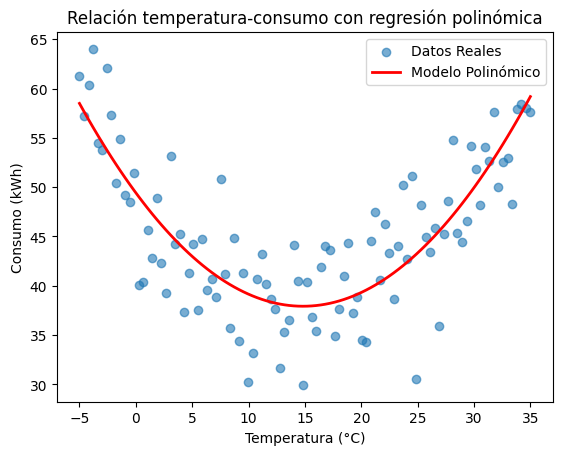

In [5]:
import matplotlib.pyplot as plt

y_pred = modelo.predict(X_poly)

plt.scatter(temperatura, consumo, alpha = 0.6, label = "Datos Reales")
plt.plot(temperatura, y_pred, color = 'red', linewidth = 2, label = "Modelo Polinómico")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Consumo (kWh)")
plt.title("Relación temperatura-consumo con regresión polinómica")
plt.legend()

plt.show()

---

### Clasificación con Árboles de Decisión

Situación: Trabajas en un banca y quieres predecir si un cliente será moroso (1) o no (0) basado en su edad y score crediticio.

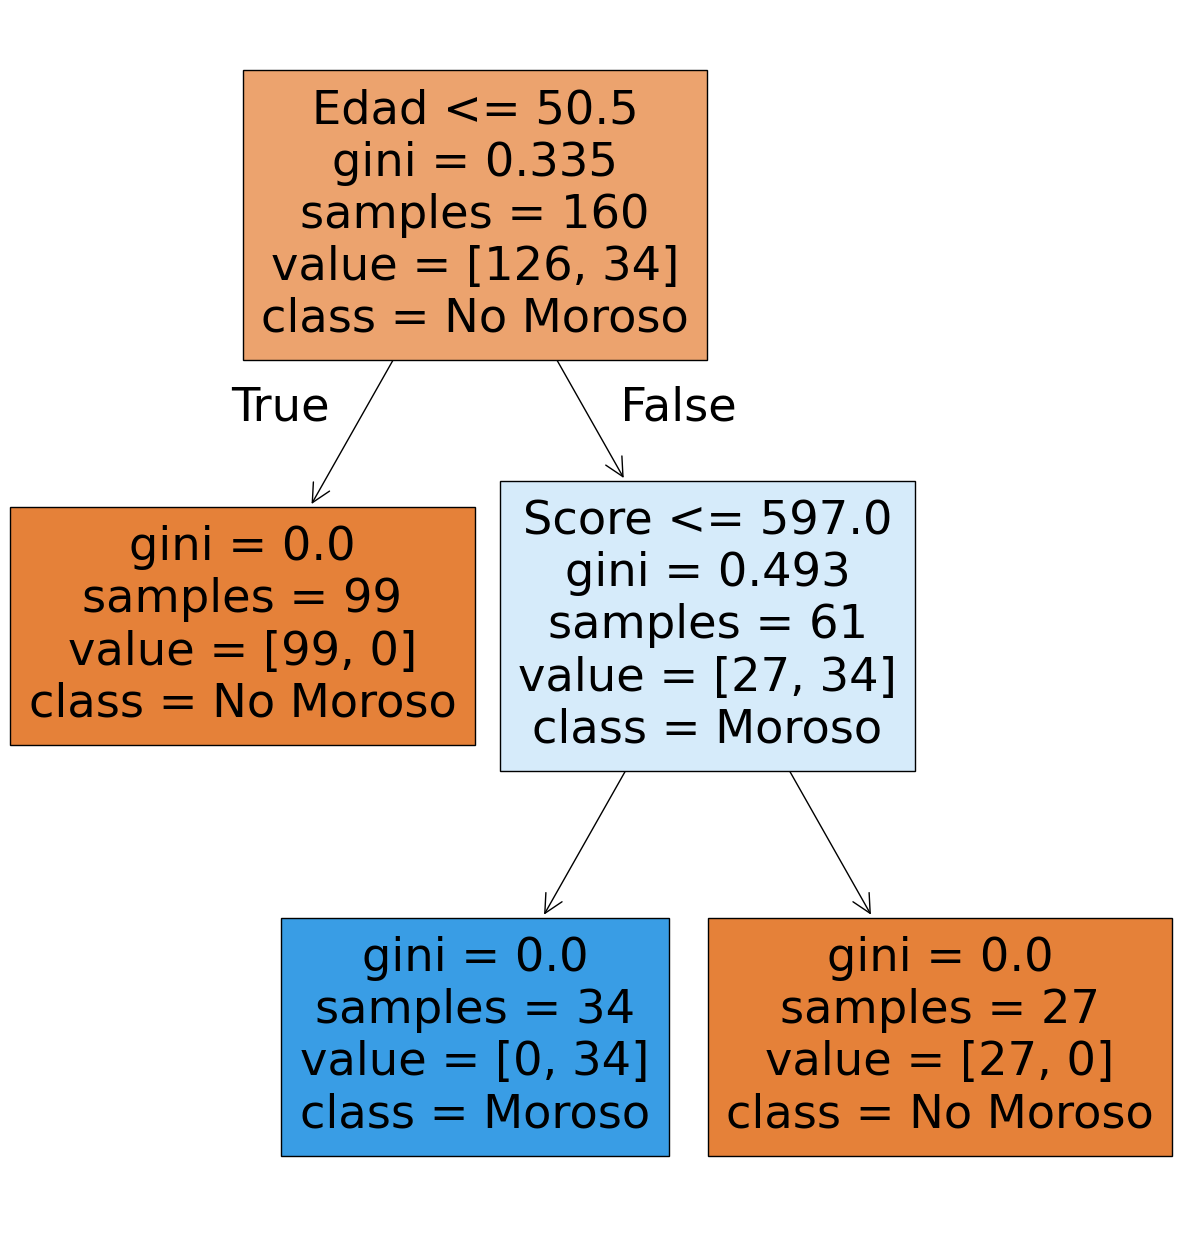

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Datos
np.random.seed(42)
edad = np.random.randint(18, 70, 200)
score_crediticio = np.random.randint(300, 850, 200)
moroso = np.where((edad > 50) & (score_crediticio < 600), 1, 0) # Relación artificial

# División train-test
X = np.column_stack([edad, score_crediticio])
X_train, X_test, y_train, y_test = train_test_split(X, moroso, test_size = 0.2, random_state = 42)

# Árbol de decisión
modelo = DecisionTreeClassifier(max_depth = 3, random_state = 42)
modelo.fit(X_train, y_train)

# Visualizar árbol
plt.figure(figsize = (15, 16))
plot_tree(modelo, feature_names = ['Edad', 'Score'], class_names = ['No Moroso', 'Moroso'], filled = True)

plt.show()

Ejercicio:

1. Calcula la precisión en el conjunto de prueba.
2. Predice si un cliente de 60 años con socre de 550 será moroso.

In [9]:
y_pred = modelo.predict(X_test)

print("Precisión en el conjuto de prueba:", accuracy_score(y_test, y_pred))

Presición en el conjuto de prueba: 1.0


In [10]:
nuevo_cliente = [[60, 550]]
prediccion = modelo.predict(nuevo_cliente)

print("Predicción para cliente:", prediccion)

Predicción para cliente: [1]


---

### Clustering con K-Means

Situación: En una tienda online, quieres segmentar clientes basado en su **frecuencia de compra** (veces/mes) y **monto promedio** de compra.

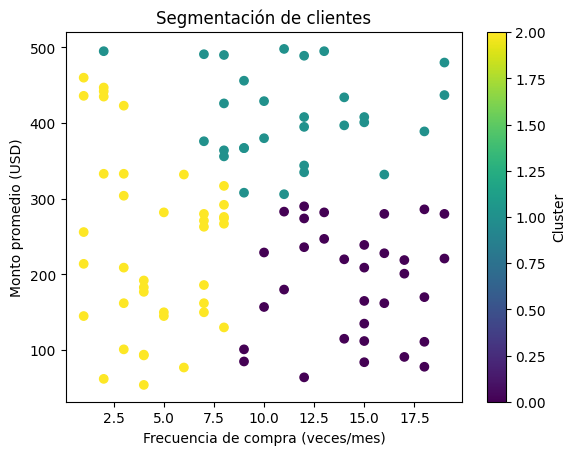

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Datos
np.random.seed(42)
frecuencia = np.random.randint(1, 20, 100)
monto = np.random.randint(50, 500, 100)
datos_clientes = np.column_stack([frecuencia, monto])

# Estandarizar datos
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(datos_clientes)

# K-Means con 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 42)
clusters = kmeans.fit_predict(datos_escalados)

# Visualizar
plt.scatter(frecuencia, monto, c = clusters, cmap = 'viridis')
plt.xlabel('Frecuencia de compra (veces/mes)')
plt.ylabel('Monto promedio (USD)')
plt.title('Segmentación de clientes')
plt.colorbar(label = 'Cluster')

plt.show()

Ejercicio:

1. Aplica el método del codo para encontrar el número óptimo de clusters.
2. Interpreta cada cluster (ej: "Clientes frecuentes con alto gasto").

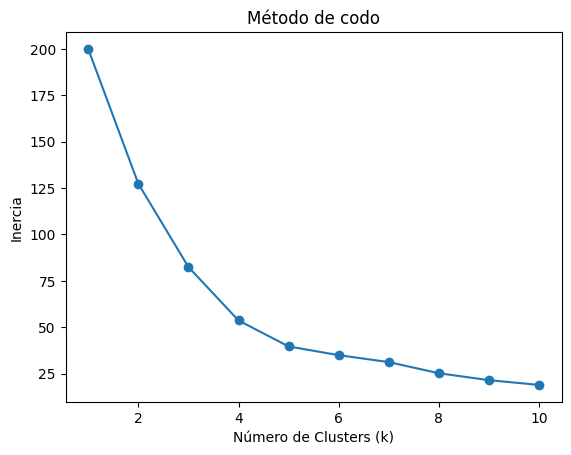

In [13]:
inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit_predict(datos_escalados)
    inercia.append(kmeans.inertia_)

plt.plot(range(1, 11), inercia, marker = 'o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método de codo')

plt.show()

Volvemos a hacer el modelo todo desde 0, pero esta vez con 5 clusters.

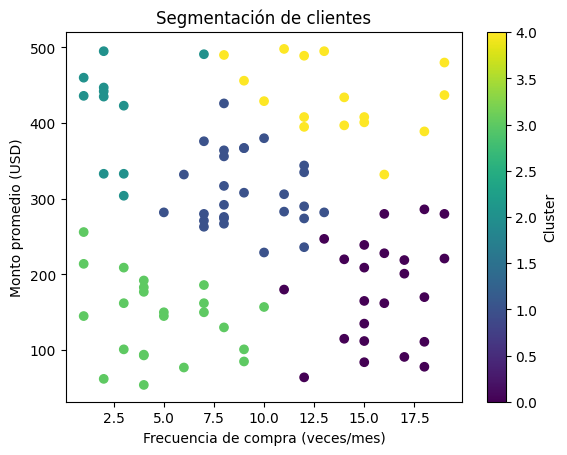

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
frecuencia = np.random.randint(1, 20, 100)
monto = np.random.randint(50, 500, 100)
datos_clientes = np.column_stack([frecuencia, monto])

scaler = StandardScaler()
datos_escalados = scaler.fit_transform(datos_clientes)

kmeans = KMeans(n_clusters = 5, random_state = 42)
clusters = kmeans.fit_predict(datos_escalados)

plt.scatter(frecuencia, monto, c = clusters, cmap = 'viridis')
plt.xlabel('Frecuencia de compra (veces/mes)')
plt.ylabel('Monto promedio (USD)')
plt.title('Segmentación de clientes')
plt.colorbar(label = 'Cluster')

plt.show()

---